In [1]:
import scipy.special as scs
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import warnings
from processing import msevn

warnings.filterwarnings("ignore")

msevn.configure_mpl()

In [2]:
# ------------------------- #

def a_n_sph(x, n, m):
    
    z1 = 1
    z2 = 2 * np.math.factorial(2*n - 1) * np.math.factorial(2*n + 1) / (4 ** n * np.math.factorial(n + 1) * np.math.factorial(n))
    z2 *= ((m ** 2 + (1 + n) / n) / (m ** 2 - 1))
    z2 /= (x ** (2 * n + 1))
    
    return np.vectorize(complex)(z1, z2) ** (-1)

# ------------------------- #

def a_n_sph_full(x, n, m):
    
    sp_jn_x = scs.spherical_jn(n, x)
    sp_jn_xd = scs.spherical_jn(n, x, True)
    
    sp_yn_x = scs.spherical_yn(n, x)
    sp_yn_xd = scs.spherical_yn(n, x, True)
    sp_h1_x = np.vectorize(complex)(sp_jn_x, sp_yn_x)
    sp_h1_xd = np.vectorize(complex)(sp_jn_xd, sp_yn_xd)
    
    sp_jn_mx = scs.spherical_jn(n, m*x)
    sp_jn_mxd = scs.spherical_jn(n, m*x, True)
    
    z11 = m**2 * sp_jn_mx * (x * sp_jn_xd + sp_jn_x)
    z12 = sp_jn_x * (m*x * sp_jn_mxd + sp_jn_mx)
    z21 = m**2 * sp_jn_mx * (x * sp_h1_xd + sp_h1_x)
    z22 = sp_h1_x * (m*x * sp_jn_mxd + sp_jn_mx)

    return (z11 - z12) / (z21 - z22)

# ------------------------- #

def drude(nenc, beta=0):
    
    ee = 1 - nenc  / np.vectorize(complex)(1, beta)
    
    return ee ** 0.5

# ------------------------- #

In [65]:
def a_n_sph1(x, n, m):
    
    z1 = 1
    z2 = 2 ** (1 + 2*n) * x ** (- 1 - 2*n)
    z2 *= 4 * (1 + n + m**2 * n) * (-3 + 4*n*(1 + n)) - \
    2 * (m**2 - 1) * (3 + n * (5 + 2*n + m**2 * (2*n - 1))) * x**2
    z2 *= math.gamma(n - 1/2) * math.gamma(n + 5/2)
    z2 /= ((m**2 - 1) * np.pi * (4 * (1 + n) * (3 + 2*n) **2 - \
        2 * (m**2 + 1) * (1 + n) * (3 + 2*n) * x**2))
    
    return np.vectorize(complex)(z1, z2) ** (-1)

# ------------------------- #

def m2_x(x, n):
    
    com = - 8*n**2*(n + 1) + (6*n + 3)*x**2 + 6*n
    denm = 2*n*x**2*(2*n - 1)

    sqrel = 4*n*(x**2)*(n - 3 + 4*n**2*(n + 2)) * (x**2 + 4*n - 2)

    res = - 1 / denm * (com + np.sqrt(sqrel + com ** 2))
    
    return res

m2_x = np.vectorize(m2_x)

In [39]:
def plot_a_n(

        ne: np.ndarray = np.linspace(0, 5, 20000),
        ka: float = 0.5,
        beta: float = 0,
        orders: list = list(range(1, 4)),
        **kwargs

    ):
    
    """
    """
    
    palette = [
        
        '#4078c0', 
        '#6cc644',
        '#bd2c00',
        '#c9510c',
        '#6e5494'
    
    ]
    
    orders = orders[:5]
        
    approx = a_n_sph
    full = a_n_sph_full
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    
    for i, o in enumerate(orders):
        
        vals = np.abs( full(ka, o, drude(ne, beta=beta)) )
        sns.lineplot(
            
            x=ne, 
            y=vals, 
            linewidth=kwargs.get('linewidth', 1), 
            ax=ax, 
            label=r'$n=%s,\:\: \rm{exact}$' % o, 
            color=palette[i]
        
        )
        
        vals = np.abs( approx(ka, o, drude(ne, beta=beta)) )
        sns.lineplot(
            
            x=ne, 
            y=vals, 
            linewidth=kwargs.get('linewidth', 1), 
            ax=ax, 
            label=r'$n=%s,\:\: \rm{asymp}$' % o, 
            color=palette[i],
            linestyle='dotted'
        
        )
    
    ax.set_xlabel(r'$n_e\:/\:n_c$', labelpad=15)
    ax.set_ylabel(r'$|\:a_n\:|$', labelpad=15)

    lgd = ax.legend(loc='lower center', bbox_to_anchor=(0, 1, 1, 0), ncol=3, fontsize=18)
    
    #plt.rcParams["mathtext.fontset"] = "cm"
    #formatter = tick.ScalarFormatter(useMathText=True)
    #formatter.set_scientific(True) 
    #formatter.set_powerlimits((-1,0)) 
    #ax.yaxis.set_major_formatter(formatter)
    #ax.xaxis.set_major_formatter(formatter)
    
    return fig, lgd

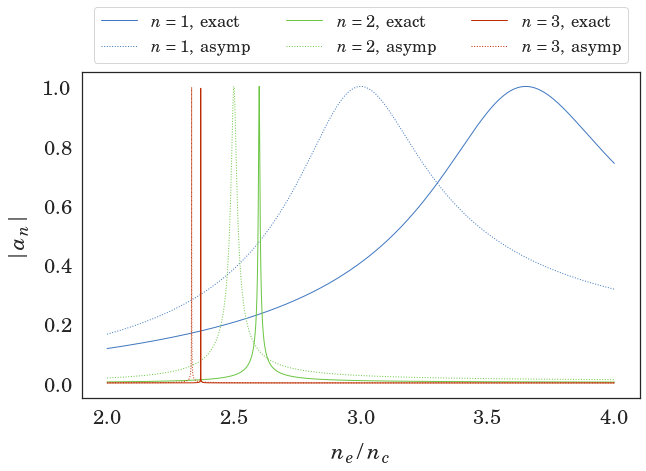

In [44]:
ff, lgd = plot_a_n(ne=np.linspace(2, 4, 100000), ka=0.5)
ff.savefig('../tex/components/img/sph_base/sph_ka0.5_123.pdf', bbox_inches='tight', bbox_extra_artists=(lgd,))

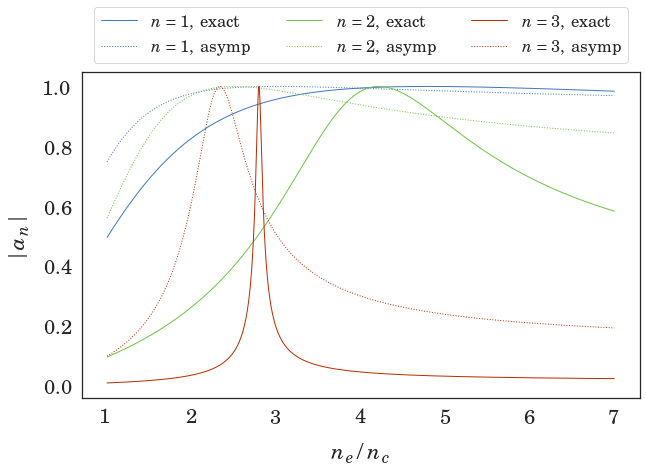

In [50]:
ff, lgd = plot_a_n(ne=np.linspace(1, 7, 100000), ka=1.5)
ff.savefig('../tex/components/img/sph_base/sph_ka1.5_123.pdf', bbox_inches='tight', bbox_extra_artists=(lgd,))

In [46]:
def plot_a_n1(

        ne: np.ndarray = np.linspace(0, 5, 20000),
        ka: float = 0.5,
        beta: float = 0,
        orders: list = list(range(1, 4)),
        **kwargs

    ):
    
    """
    """
    
    palette = [
        
        '#4078c0', 
        '#6cc644',
        '#bd2c00',
        '#c9510c',
        '#6e5494'
    
    ]
    
    orders = orders[:5]

    approx = a_n_sph1
    full = a_n_sph_full

    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    
    for i, o in enumerate(orders):
        
        vals = np.abs( full(ka, o, drude(ne, beta=beta)) )
        sns.lineplot(
            
            x=ne, 
            y=vals, 
            linewidth=kwargs.get('linewidth', 1), 
            ax=ax, 
            label=r'$n=%s,\:\: \rm{exact}$' % o, 
            color=palette[i]
        
        )
        
        vals = np.abs( approx(ka, o, drude(ne, beta=beta)) )
        sns.lineplot(
            
            x=ne, 
            y=vals, 
            linewidth=kwargs.get('linewidth', 1), 
            ax=ax, 
            label=r'$n=%s,\:\: \rm{asymp}$' % o, 
            color=palette[i],
            linestyle='dotted'
        
        )
    
    ax.set_xlabel(r'$n_e\:/\:n_c$', labelpad=15)
    ax.set_ylabel(r'$|\:a_n\:|$', labelpad=15)

    lgd = ax.legend(loc='lower center', bbox_to_anchor=(0, 1, 1, 0), ncol=3, fontsize=18)
    
    return fig, lgd

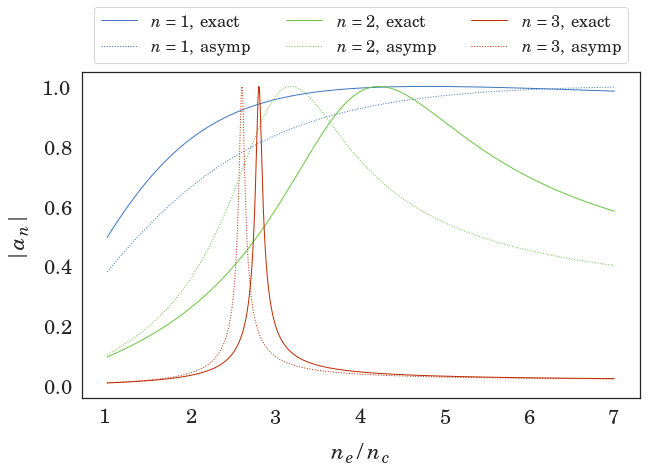

In [51]:
ff, lgd = plot_a_n1(ne=np.linspace(1, 7, 100000), ka=1.5)
ff.savefig('../tex/components/img/sph_base/sph_ka1.5_123_1st.pdf', bbox_inches='tight', bbox_extra_artists=(lgd,))

In [57]:
def plot_m2_x(

        #ne: np.ndarray = np.linspace(0, 5, 20000),
        ka: np.ndarray = np.linspace(0.01, 5, 20000),
        beta: float = 0,
        orders: list = list(range(1, 4)),
        nenc: bool = False,
        **kwargs

    ):
    
    """
    """
    
    palette = [
        
        '#4078c0', 
        '#6cc644',
        '#bd2c00',
        '#c9510c',
        '#6e5494'
    
    ]
    
    orders = orders[:5]

    #m2_x

    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    
    for i, o in enumerate(orders):
        
        vals = m2_x(ka, o)
        
        if nenc:
            vals = np.abs((1 - vals) * complex(1, beta))
            
        sns.lineplot(
            
            x=ka, 
            y=vals, 
            linewidth=kwargs.get('linewidth', 1), 
            ax=ax, 
            label=r'$n=%s$' % o, 
            color=palette[i]
        
        )
        
#         vals = np.abs( approx(ka, o, drude(ne, beta=beta)) )
#         sns.lineplot(
            
#             x=ne, 
#             y=vals, 
#             linewidth=kwargs.get('linewidth', 1), 
#             ax=ax, 
#             label=r'$n=%s,\:\: \rm{asymp}$' % o, 
#             color=palette[i],
#             linestyle='dotted'
        
#         )
    
    ax.set_xlabel(r'$ka$', labelpad=15)
    
    if nenc:
        ax.set_ylabel(r'$n_e\:/\:n_c$', labelpad=15)
    else:
        ax.set_ylabel(r'$m^2$', labelpad=15)

    lgd = ax.legend(loc='lower center', bbox_to_anchor=(0, 1, 1, 0), ncol=3, fontsize=18)
    
    return fig, lgd

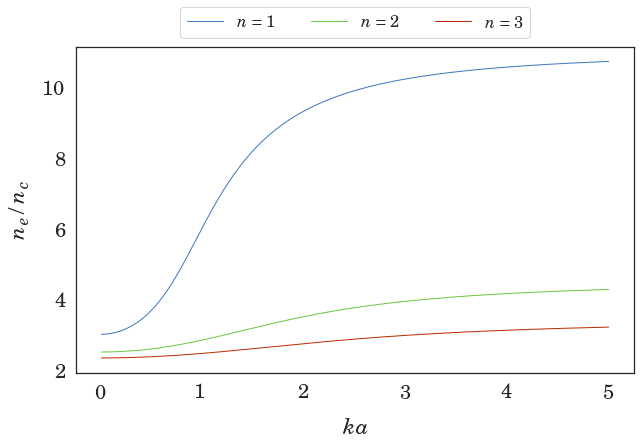

In [66]:
ff, lgd = plot_m2_x(nenc=True)
#ff.savefig('../tex/components/img/sph_base/nenc_123.pdf', bbox_inches='tight', bbox_extra_artists=(lgd,))